In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from functools import partial
from pyprojroot import here
from scipy.stats import bootstrap

%matplotlib inline

In [11]:
df = pd.read_csv(here('data/aita_processed_gpt_run_3.csv'))
df['gpt_label'].replace({'INF': 'INFO'}, inplace=True)

In [12]:
labels = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO']
n_labels = len(labels)

In [13]:
# Calculate bootstrap estimates
def categorical_proportion(data, category):
    return np.mean(data == category)

In [14]:
observed_bounds = [
    bootstrap((df['true_label'].values,), partial(categorical_proportion, category=label))
    for label in labels]

In [15]:
gpt_bounds = [
    bootstrap((df['gpt_label'].values,), partial(categorical_proportion, category=label))
    for label in labels]

[Text(0, 0, 'NTA'),
 Text(1, 0, 'YTA'),
 Text(2, 0, 'NAH'),
 Text(3, 0, 'ESH'),
 Text(4, 0, 'INFO')]

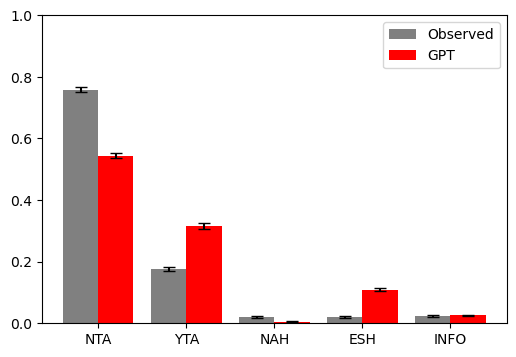

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

observed_counts = df['true_label'].value_counts(normalize=True)
gpt_counts = df['gpt_label'].value_counts(normalize=True)

width = 0.4

ax.bar(x=np.arange(n_labels) - width / 2,
       height=[observed_counts[label] for label in labels],
       width=width,
       yerr=[[observed_bounds[ii].confidence_interval.high - observed_counts[labels[ii]]
              for ii in range(n_labels)],
             [observed_counts[labels[ii]] - observed_bounds[ii].confidence_interval.low
              for ii in range(n_labels)]],
       error_kw={'capsize': 4},
       color='gray',
       label='Observed')
ax.bar(x=np.arange(n_labels) + width / 2,
       height=[gpt_counts[label] for label in labels],
       width=width,
       yerr=[[gpt_bounds[ii].confidence_interval.high - gpt_counts[labels[ii]]
              for ii in range(n_labels)],
             [gpt_counts[labels[ii]] - gpt_bounds[ii].confidence_interval.low
              for ii in range(n_labels)]],
       error_kw={'capsize': 4},
       color='red',
       label='GPT')

ax.set_ylim([0, 1])
ax.legend(loc=0, prop={'size': 10})
ax.set_xticks(np.arange(n_labels))
ax.set_xticklabels(['NTA', 'YTA', 'NAH', 'ESH', 'INFO'])

In [8]:
ct = pd.crosstab(df['true_label'], df['gpt_label']).reindex(labels)[labels]

Text(50.722222222222214, 0.5, 'Observed Label')

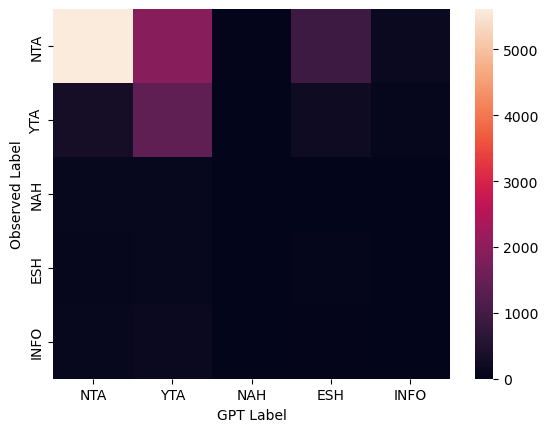

In [9]:
ax = sns.heatmap(ct)
ax.set_xlabel('GPT Label')
ax.set_ylabel('Observed Label')

In [10]:
ct_normed = pd.crosstab(df['true_label'], df['gpt_label'], normalize='index').reindex(labels)[labels]

Text(50.722222222222214, 0.5, 'Observed Label')

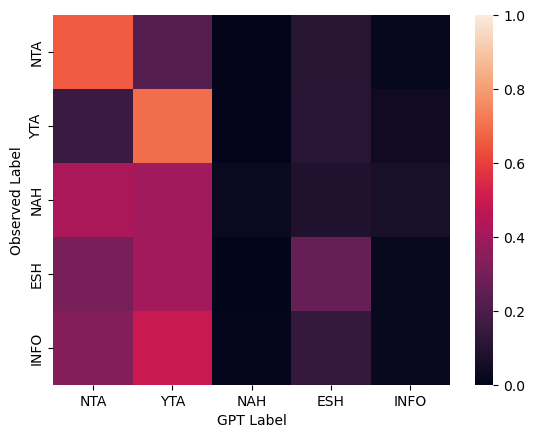

In [12]:
ax = sns.heatmap(ct_normed, vmin=0, vmax=1)
ax.set_xlabel('GPT Label')
ax.set_ylabel('Observed Label')

In [15]:
df['right_label'] = df['gpt_label'] == df['true_label']

In [30]:
df['quantile'] = pd.qcut(df['score'], 10)

In [58]:
df.groupby('quantile')['true_label'].agg(lambda x: (x == 'NTA').mean())

quantile
(25.999, 84.0]       0.750439
(84.0, 156.0]        0.765118
(156.0, 259.2]       0.771277
(259.2, 412.0]       0.798946
(412.0, 636.0]       0.807590
(636.0, 997.8]       0.780423
(997.8, 1674.0]      0.759894
(1674.0, 2818.0]     0.776211
(2818.0, 5375.0]     0.734155
(5375.0, 48701.0]    0.629630
Name: true_label, dtype: float64

In [37]:
df[df['true_label'] == 'NTA']['gpt_label'].value_counts(normalize=True)[labels]

gpt_label
NTA     0.652558
YTA     0.222907
NAH     0.004186
ESH     0.102209
INFO    0.018140
Name: proportion, dtype: float64

In [43]:
df['true_label'].value_counts()

true_label
NTA     8600
YTA     2005
INFO     277
NAH      238
ESH      235
Name: count, dtype: int64

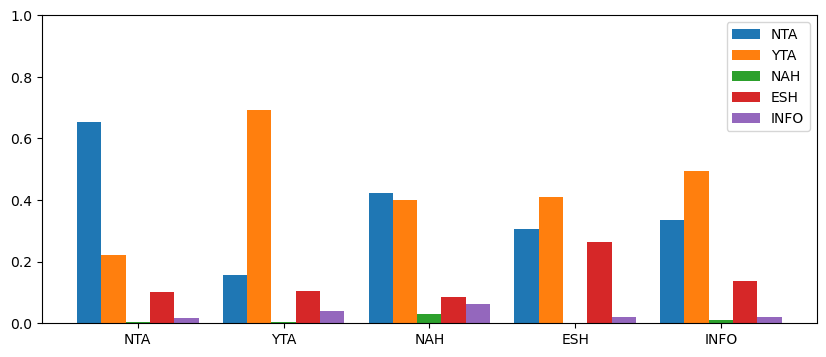

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for ii, label in enumerate(labels):
    counts = df[df['true_label'] == label]['gpt_label'].value_counts(normalize=True)
    for label in labels:
        if label not in counts.index:
            counts[label] = 0
    ax.bar(x=6*ii + np.arange(n_labels),
           width=1,
           height=counts[labels],
           color=['C0', 'C1', 'C2', 'C3', 'C4'])

ax.bar(x=[0, 1, 2, 3, 4],
        height=[0, 0, 0, 0, 0],
        color=['C0', 'C1', 'C2', 'C3', 'C4'],
        label=labels)
ax.set_xticks([2, 8, 14, 20, 26])
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
plt.legend(loc=0, prop={'size': 10})